<a href="https://colab.research.google.com/github/SRARNAB7/HDS_5230_07_Arnab/blob/main/Facial_Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The command pip install -r requirements.txt installs all Python packages listed in the requirements.txt file at their specified versions. Many packages were already installed, while some are being downloaded and installed using cached metadata. The purpose is to ensure that the environment has the exact versions needed for compatibility.

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: absl-py==2.2.2 in c:\users\asutar1\appdata\local\anaconda3\lib\site-packages (from -r requirements.txt (line 1)) (2.2.2)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached h5py-3.13.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached pygments-2.19.1-py

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow-io-gcs-filesystem==0.31.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-io-gcs-filesystem==0.31.0


This Python code extracts the contents of a ZIP file. It first defines the path to the ZIP file and the destination folder. If the destination folder (fer_data) doesn’t exist, it creates it. Then, it opens the ZIP file and extracts all its contents into that folder. Finally, it prints a message showing where the files were extracted.

In [1]:
import zipfile
import os
zip_path = r'C:\Users\asutar1\Downloads\archive.zip'
extract_path= r'C:\Users\asutar1\Downloads\fer_data'
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

print(f"Files Extracted to:{extract_path}")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\asutar1\\Downloads\\archive.zip'

The command !pip install tensorflow installs the TensorFlow library in the current Python environment. The exclamation mark (!) is used in environments like Jupyter notebooks to run shell commands. TensorFlow is a popular open-source library for machine learning and deep learning.

In [1]:
!pip install tensorflow

This code imports the necessary libraries for building a convolutional neural network using TensorFlow and Keras. It includes tools for image preprocessing, numerical computations, and data visualization. It also loads the VGG19 pre-trained model and various neural network layers to help construct a custom deep learning model. Lastly, it imports the os module to handle file paths and directories.

In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D,Input,Dense, Dropout
from keras.layers import Flatten,Conv2D,MaxPooling2D,BatchNormalization
import os


This code defines two variables: train_dir and test_dir, which store the file paths to the training and testing image datasets, respectively.

In [2]:
train_dir = "C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train"
test_dir = "C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/test"

It sets the image size to 48 by 48 pixels for all input images. It sets the batch size to 64, meaning the model will update its weights after processing every 64 images. It also sets the number of training epochs to 50, so the model will train over the entire dataset 50 times.

In [3]:
image_size=(48,48)
batch_size=64       #key hyperparameter, it refers to the no of training examples used in 1 iteration of updating the models weight
epochs=50

It defines a function count_images that counts the total number of image files in a given directory, including all its subdirectories. It then uses this function to count and store the number of training and testing images. Finally, it prints the total number of images in both the training and testing datasets.

In [4]:

def count_images(dir):
  total_images= 0

  for sub_dir,_,files in os.walk(dir):
    total_images += len(files)

  return total_images

train_images= count_images(train_dir)
test_images= count_images(test_dir)

print(f"Total Training Images:{train_images}")
print(f"Total Testing Images:{test_images}")

Total Training Images:28709
Total Testing Images:7178


It defines a function count_images_per_dir that counts and prints the number of image files in each subdirectory of a given directory. It then calls this function for both the training and testing directories, displaying how many images are in each folder of the training and testing sets.

In [5]:
def count_images_per_dir(dir):

  for sub_dir,_,files in os.walk(dir):
    total_images = len(files)
    print(f"{sub_dir} contents:{total_images}")

print("Training set images count in each folder")
count_images_per_dir(train_dir)

print("Testing set images count in each folder")
count_images_per_dir(test_dir)


Training set images count in each folder
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train contents:0
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train\angry contents:3995
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train\disgust contents:436
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train\fear contents:4097
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train\happy contents:7215
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train\neutral contents:4965
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train\sad contents:4830
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/train\surprise contents:3171
Testing set images count in each folder
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/test contents:0
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/test\angry contents:958
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/test\disgust contents:111
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/test\fear contents:1024
C:/Users/asutar1/Downloads/FER_PROJECT/fer_data/tes

It creates a data augmentation pipeline for training images using ImageDataGenerator. It rescales pixel values to a 0–1 range and applies random transformations such as rotation (up to 20 degrees), shearing, zooming, and horizontal flipping. These augmentations help the model generalize better by creating more varied versions of the training images.

In [6]:
#data augumentation for training
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
   # width_shift_range=0.2,
   # height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

It creates a test_datagen object using ImageDataGenerator that only rescales the pixel values of test images by dividing them by 255. This normalization converts pixel values from the range [0, 255] to [0, 1], which is a standard preprocessing step for image inputs in neural networks. No data augmentation is applied to the test set to ensure consistent evaluation.

In [7]:
test_datagen= ImageDataGenerator(rescale=1./255) # 255 color combination

It creates a train_generator that loads and preprocesses images from the training directory using the train_datagen settings. It resizes all images to 48x48 pixels, groups them into batches of 64, converts labels into categorical format for multi-class classification, processes images in grayscale, and shuffles the data to improve training performance.

In [8]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode= 'grayscale',
    shuffle=True
)

Found 28709 images belonging to 7 classes.


It creates a test_generator to load and preprocess images from the test directory using the same preprocessing settings as the training data. Images are resized to 48x48 pixels, grouped into batches of 64, converted to categorical labels, and processed in grayscale. Shuffling is set to False to maintain the original order of the test images for consistent evaluation. Since it is test so it is kept as false.

In [9]:
test_generator= train_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode= 'grayscale',
    shuffle= False
)

Found 7178 images belonging to 7 classes.


It defines a function plot_sample_data to visualize a few sample images from a data generator (like train_generator or test_generator). It retrieves a batch of images and labels, maps the numeric labels to class names, and then plots a specified number of grayscale images with their corresponding class labels and codes. The function is called twice—once for the training set and once for the test set—to display sample images from both.

Data print from the folders with labesl label code sample image with type and code class code 6 label photo print VGG16 model


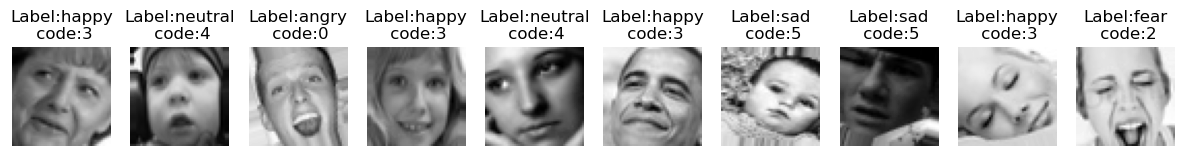

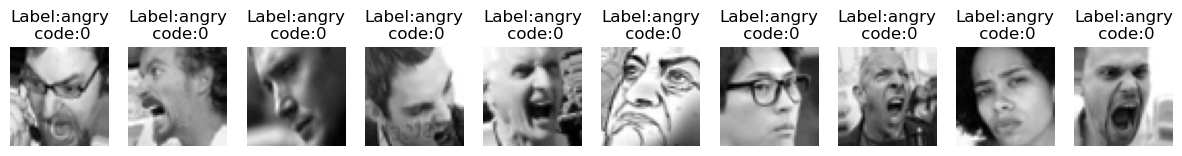

In [10]:
def plot_sample_data(generator,number_samples=10):
  images,labels= next(generator)

  class_indices= generator.class_indices
  #print("Class Indices:",class_indices)
  class_names= list(class_indices.keys())
  #print("Class Names:",class_names)

  plt.figure(figsize=(15,15))

  for i in range(number_samples):
    plt.subplot(1,number_samples,i+1)
    plt.imshow(images[i].reshape(image_size[0],image_size[1]),cmap='grey') # first convert then give color
    label_index= np.argmax(labels[i]) # argmax func returns indices of the max element of the array
    #print(label_index)
    label_name= class_names[label_index]
    plt.title(f'Label:{label_name}\n code:{label_index}')
    plt.axis('off')
  plt.show()

plot_sample_data(train_generator)
plot_sample_data(test_generator)



It builds a facial emotion recognition model using the pre-trained VGG19 architecture. It starts by loading VGG19 without its top layers and with an input shape of 48x48x3, since the model expects RGB images. To handle grayscale input, it creates an input layer with shape 48x48x1 and uses a 1x1 convolution to convert it to 3 channels. The processed input is then passed through the VGG19 base, followed by custom layers including global average pooling, dense layers with ReLU activation, batch normalization, dropout for regularization, and a final dense layer with 7 neurons using softmax activation for multi-class classification. Most of the VGG19 layers are frozen to keep their pre-trained weights, except the last four layers which remain trainable. Finally, the model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric, and the model summary is displayed.

In [13]:
from keras.optimizers import Adam
#Define Model
base_model= VGG19(weights='imagenet', include_top= False, input_shape= (48,48,3))# in one channel since in gral scale only
#Adding custom layers on top
input_tensor= Input(shape= (48,48,1))
layers=Conv2D(3,(1,1),padding='same')(input_tensor)
layers= Model(inputs= input_tensor,outputs=layers)(input_tensor)
base_model_output= base_model(layers)
layers= base_model_output
layers= GlobalAveragePooling2D()(layers)
layers= Dense(512,activation='relu')(layers) # 256 no of neurons, relu for non linear
layers= BatchNormalization()(layers)
layers= Dropout(0.5)(layers)
layers= Dense(256,activation='relu')(layers) # 256 no of neurons, relu for non linear
layers= BatchNormalization()(layers)
layers= Dropout(0.5)(layers)
predictions = Dense(7,activation='softmax')(layers) #7 neurons since 7 class and softmax when multiclass classification

model_vgg19= Model(inputs=input_tensor,outputs=predictions)
for layer in base_model.layers[:-4]:
  layer.trainable=False

model_vgg19.compile(optimizer= Adam(learning_rate= 0.0001),loss= 'categorical_crossentropy', metrics= ['accuracy'])
model_vgg19.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 48, 48, 3)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,423,245 (77.91 MB)

 Trainable params: 7,476,749 (28.52 MB)

 Non-trainable params: 12,946,496 (49.39 MB)

It trains the model_vgg19 using the training and testing data generators. It runs for 50 epochs, where each epoch processes a number of steps equal to the total training samples divided by the batch size. During training, the model also evaluates its performance on the test data at the end of each epoch. The training process returns a history_vgg19 object that stores the accuracy and loss values for both training and validation sets across all epochs.

In [26]:
history_vgg19= model_vgg19.fit(
    train_generator,
    steps_per_epoch= train_generator.samples // batch_size,
    validation_data=  test_generator,
    validation_steps = test_generator.samples // batch_size,
    epochs = 50
)


C:\Users\asutar1\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1900s 4s/step - accuracy: 0.1638 - loss: 2.8296 - val_accuracy: 0.1423 - val_loss: 5.6363
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 14:42 2s/step - accuracy: 0.2188 - loss: 2.6477

C:\Users\asutar1\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 106s 233ms/step - accuracy: 0.2188 - loss: 2.6477 - val_accuracy: 0.1413 - val_loss: 5.5542
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1274s 3s/step - accuracy: 0.1978 - loss: 2.4829 - val_accuracy: 0.2595 - val_loss: 2.3476
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 152s 334ms/step - accuracy: 0.2344 - loss: 2.2904 - val_accuracy: 0.2573 - val_loss: 2.3007
Epoch 5/50
102/448 ━━━━━━━━━━━━━━━━━━━━ 14:27 3s/step - accuracy: 0.2291 - loss: 2.2978

KeyboardInterrupt: 

It saves the trained model_vgg19 to a file named my_model_vgg19.h5 in the specified directory. The .h5 format stores the model architecture, weights, and training configuration, allowing the model to be reloaded later for inference or further training.

In [16]:
model_vgg19.save('C:/Users/asutar1/Downloads/FER_PROJECT/my_model_vgg19.h5')

It imports the load_model function from Keras and uses it to load a previously saved model from the file my_model_vgg19.h5. The loaded model is assigned to the variable model_vgg19, making it ready for predictions or further evaluation.

In [11]:
from tensorflow.keras.models import load_model
path= r"my_model_vgg19.h5"
model_vgg19= load_model(path)

It evaluates the performance of the loaded model_vgg19 on the test dataset. It calculates the loss and accuracy using the test_generator, then prints the test accuracy and loss as percentages with two decimal places.

In [12]:
test_loss, test_accuracy = model_vgg19.evaluate(test_generator)
print(f'Test Accuracy:{test_accuracy*100:.2f}%')
print(f'Test Loss:{test_loss*100:.2f}%')

C:\Users\asutar1\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 113s 990ms/step - accuracy: 0.4986 - loss: 1.5809
Test Accuracy:54.78%
Test Loss:140.79%


The model achieved a test accuracy of 54.78%, which means it correctly predicted about 54% of the test images. The test loss was shown as 140.79%, but this value appears high because the actual loss was likely around 1.58 and was multiplied by 100 for display. This indicates the model's predictions are still far from ideal. The relatively low accuracy and high loss suggest the model may not be learning well enough, possibly due to limited training, class imbalance, or the need for further fine-tuning.

It evaluates the detailed classification performance of the trained model on the test dataset. First, it makes predictions using model_vgg19.predict(test_generator) and converts the predicted probability values into class labels using np.argmax. Then, it prints a confusion matrix to show how well the model correctly or incorrectly predicted each class. Finally, it prints a classification report that includes precision, recall, F1-score, and support for each emotion category, using the actual class names retrieved from the training generator. This helps assess how accurately the model performs for each specific emotion.

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(model_vgg19.history['accuracy'],label= 'Training Accuracy')
plt.plot(model_vgg19.history['val_accuracy'],label= 'Validation Accuracy')
plt.title('Training and VAlidation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_vgg19.history['loss'],label= 'Training Loss')
plt.plot(history_vgg19.history['val_loss'],label= 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred= model_vgg19.predict(test_generator)
y_pred= np.argmax(Y_pred,axis=1)
print('Confusion matrix')
print(confusion_matrix(test_generator.classes,y_pred))

print('Classification Report')
target_column= list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes,y_pred,target_names=target_column))



113/113 ━━━━━━━━━━━━━━━━━━━━ 110s 965ms/step
Confusion matrix
[[ 388    4   86  160  174  113   33]
 [  26   52    5   11   10    6    1]
 [ 100    4  363  102  175  173  107]
 [  54    3   34 1362  192   97   32]
 [  76    1   65  179  723  145   44]
 [ 112    2  162  185  309  444   33]
 [  21    1   78   61   73   15  582]]
Classification Report
              precision    recall  f1-score   support

       angry       0.50      0.41      0.45       958
     disgust       0.78      0.47      0.58       111
        fear       0.46      0.35      0.40      1024
       happy       0.66      0.77      0.71      1774
     neutral       0.44      0.59      0.50      1233
         sad       0.45      0.36      0.40      1247
    surprise       0.70      0.70      0.70       831

    accuracy                           0.55      7178
   macro avg       0.57      0.52      0.53      7178
weighted avg       0.54      0.55      0.54      7178



This command installs the opencv-python package using pip. OpenCV is an open-source library widely used for computer vision tasks such as image processing, object detection, and video analysis. The exclamation mark ! is used in environments like Jupyter notebooks to run shell commands directly.

In [17]:
!pip install opencv-python

It uses a webcam to perform real-time facial emotion recognition. It begins by importing necessary libraries like TensorFlow, OpenCV, and NumPy. The model expects images of size 48x48, and a dictionary is defined to map prediction outputs to emotion labels such as Happy, Sad, and Angry. The Haar cascade classifier is used to detect faces in each frame of the video. When a face is detected, it is converted to grayscale, resized to 48x48, normalized, and then passed to the trained model to predict the emotion. The predicted emotion is displayed on the video feed above the detected face using a bounding box and text. The video stream continues until the user presses the 'q' key, after which the camera is turned off and all OpenCV windows are closed.

In [15]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2


#h5_model_path = r'E:\EMOTION_RECOG\my_vgg19_model.h5'  
#model_vgg19 = load_model(h5_model_path)

image_size = (48, 48)
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_emotion_realtime_face_detect(model, target_size=(48, 48)):
    """
    Opens the system camera, detects faces in each frame, and predicts
    emotions on detected faces in real-time video.

    Args:
        model: Trained Keras model for emotion recognition.
        target_size: Target image size for the emotion model.
    """
    cap = cv2.VideoCapture(0)  

    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    while(cap.isOpened()):
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            face_roi_gray = gray_frame[y:y + h, x:x + w] 
            resized_face = cv2.resize(face_roi_gray, target_size) 
            img_array = image.img_to_array(resized_face) 
            img_array = np.expand_dims(img_array, axis=0) 
            img_array = img_array / 255.0 

            prediction = model.predict(img_array) 
            emotion_index = np.argmax(prediction) 
            predicted_emotion = emotion_labels[emotion_index] 

            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2) 
            cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2) 

        cv2.imshow('Real-time Face Emotion Recognition', frame) 

        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break

    cap.release()
    cv2.destroyAllWindows()

predict_emotion_realtime_face_detect(model_vgg19, target_size=image_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━